# Importing required libraries/modules

In [7]:
import fitz
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mihai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mihai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Load quarterly press earnings call transcripts from Alibaba

In [8]:
# loading FY18 press releases
q4_fy18 = 'q4 fy18.pdf'

# loading FY19 press releases
q3_fy19, q4_fy19 = 'q3 fy19.pdf', 'q4 fy19.pdf' 

# loading FY20 press releases
q1_fy20, q2_fy20, q3_fy20, q4_fy20 = 'q1 fy20.pdf', 'q2 fy20.pdf', 'q3 fy20.pdf', 'q4 fy20.pdf'

# loading FY21 press releases
q1_fy21, q2_fy21, q3_fy21, q4_fy21 = 'q1 fy21.pdf', 'q2 fy21.pdf', 'q3 fy21.pdf', 'q4 fy21.pdf'

# loading FY22 press releases
q1_fy22, q2_fy22, q3_fy22, q4_fy22 = 'q1 fy22.pdf', 'q2 fy22.pdf', 'q3 fy22.pdf', 'q4 fy22.pdf'

# loading FY23 press releases
q1_fy23, q2_fy23, q3_fy23, q4_fy23 = 'q1 fy23.pdf', 'q2 fy23.pdf', 'q3 fy23.pdf', 'q4 fy23.pdf'

# loading FY24 press releases
q1_fy24, q2_fy24 = 'q1 fy24.pdf', 'q2 fy24.pdf'


index = ['Q4 FY18', 'Q3 FY19', 'Q4 FY19', 'Q1 FY20', 'Q2 FY20', 'Q3 FY20', 'Q4 FY20', 'Q1 FY21', 'Q2 FY21', 'Q3 FY21', 'Q4 FY21', 'Q1 FY22', 'Q2 FY22', 'Q3 FY22', 'Q4 FY22', 'Q1 FY23', 'Q2 FY23', 'Q3 FY23', 'Q4 FY23', 'Q1 FY24', 'Q2 FY24']

# Creating a model that extracts data from Alibaba's earnings calls and buckets the data using NLP method 

### Create a Simple Algorithm that Reads the Earnings Call Transcripts

In [9]:
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page_number in range(doc.page_count):
        page = doc[page_number]
        text += page.get_text()

    doc.close()
    return text

### Preprocess text data using nltk word lemmatization method

In [10]:
def preprocess_text(text):
    # Convert to lowercase, remove non-alphanumeric characters, and split into words
    words = [word.lower().strip('.,?!') for word in text.split()]

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

### Create a function to get top n words from each transcript (default n=10)

In [11]:
def get_top_words(text, top_n=10):
    # Preprocess the text
    words = preprocess_text(text)

    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)

    # Filter out non-noun words (modify as needed)
    noun_words = [word for word, pos in tagged_words if pos.startswith('N')]

    # Count occurrences
    word_counts = Counter(noun_words)

    # Get the top N words
    top_words = word_counts.most_common(top_n)
    return top_words

### Bucket each word using WordNet NLP class

In [12]:
def get_generic_category(word):
    # Use WordNet to get the most common hypernym (generic category) for a word
    synsets = wordnet.synsets(word)
    
    if synsets:
        hypernyms = synsets[0].hypernyms()
        if hypernyms:
            return hypernyms[0].name().split('.')[0]
    
    # Handle the case when no synsets or hypernyms are available
    return 'N/A'

### Get top 15 words per quarter

In [18]:
# Read text from pdf

# FY18 press releases
pdf_text_q4_fy18 = extract_text_from_pdf(q4_fy18)

# FY19 press releases
pdf_text_q3_fy19, pdf_text_q4_fy19 = extract_text_from_pdf(q3_fy19), extract_text_from_pdf(q4_fy19)

# FY20 press releases
pdf_text_q1_fy20, pdf_text_q2_fy20, pdf_text_q3_fy20, pdf_text_q4_fy20 = extract_text_from_pdf(q1_fy20), extract_text_from_pdf(q2_fy20), extract_text_from_pdf(q3_fy20), extract_text_from_pdf(q4_fy20)

# FY21 press releases
pdf_text_q1_fy21, pdf_text_q2_fy21, pdf_text_q3_fy21, pdf_text_q4_fy21 = extract_text_from_pdf(q1_fy21), extract_text_from_pdf(q2_fy21), extract_text_from_pdf(q3_fy21), extract_text_from_pdf(q4_fy21)

# FY22 press releases
pdf_text_q1_fy22, pdf_text_q2_fy22, pdf_text_q3_fy22, pdf_text_q4_fy22 = extract_text_from_pdf(q1_fy22), extract_text_from_pdf(q2_fy22), extract_text_from_pdf(q3_fy22), extract_text_from_pdf(q4_fy22)

# FY23 press releases
pdf_text_q1_fy23, pdf_text_q2_fy23, pdf_text_q3_fy23, pdf_text_q4_fy23 = extract_text_from_pdf(q1_fy23), extract_text_from_pdf(q2_fy23), extract_text_from_pdf(q3_fy23), extract_text_from_pdf(q4_fy23)

# FY24 press releases
pdf_text_q1_fy24, pdf_text_q2_fy24 = extract_text_from_pdf(q1_fy24), extract_text_from_pdf(q2_fy24)


list_of_calls = [pdf_text_q4_fy18, pdf_text_q3_fy19, pdf_text_q4_fy19, pdf_text_q1_fy20, pdf_text_q2_fy20, pdf_text_q3_fy20, pdf_text_q4_fy20, pdf_text_q1_fy21, pdf_text_q2_fy21, pdf_text_q3_fy21, pdf_text_q4_fy21, pdf_text_q1_fy22, pdf_text_q2_fy22, pdf_text_q3_fy22, pdf_text_q4_fy22, pdf_text_q1_fy23, pdf_text_q2_fy23, pdf_text_q3_fy23, pdf_text_q4_fy23, pdf_text_q1_fy24, pdf_text_q2_fy24]


top_n_words = []
# Get the top 15 words
for top in list_of_calls:
    top_words = get_top_words(top, top_n=15)
    top_n_words.append(top_words)


### Apply NLP Bucketing on top 10,000 words for each quarter

In [43]:
bucket_list = []
for earnings_call in list_of_calls:
    new_dict = {}
    top_words = get_top_words(earnings_call, top_n=10000)
    generic_categories = {word: get_generic_category(word) for word, _ in top_words}

    for key, value in generic_categories.items():
        if value not in new_dict:
            new_dict[value] = [key]
        else:
            new_dict[value].append(key)
    new_dict.pop('N/A', None)
    bucket_list.append(new_dict)
  

### Plot the data for each quarter 

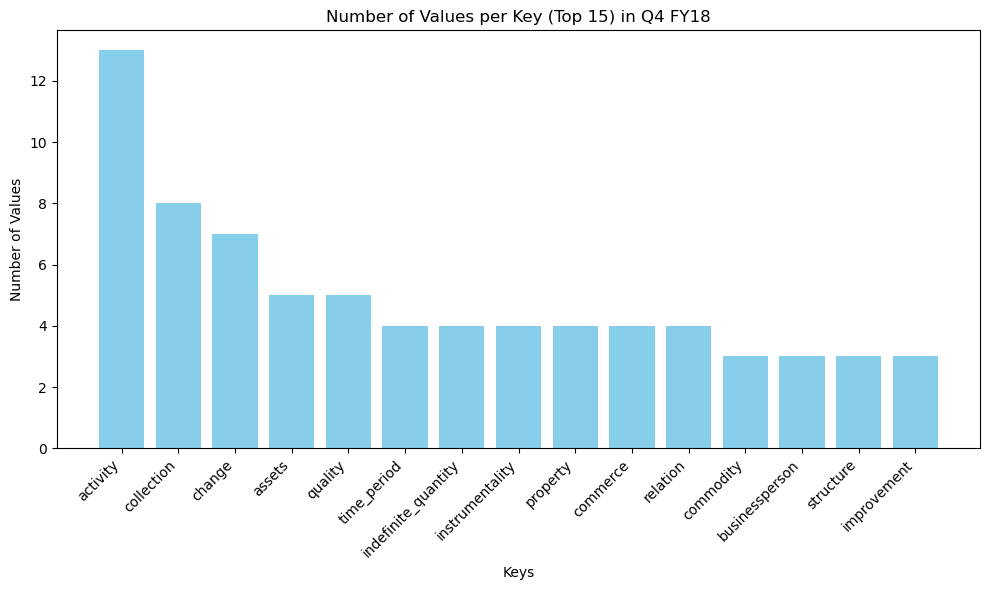

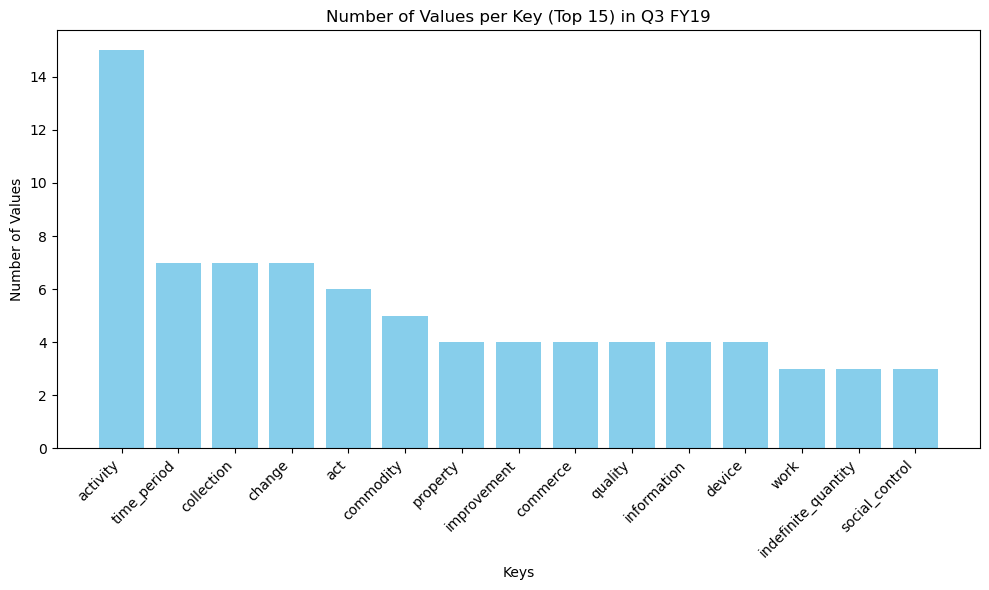

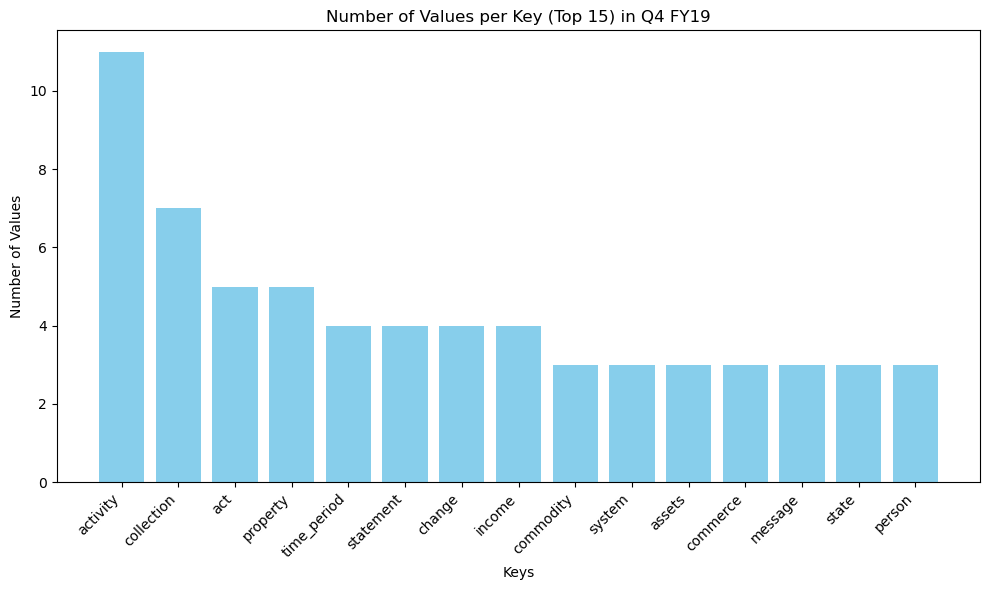

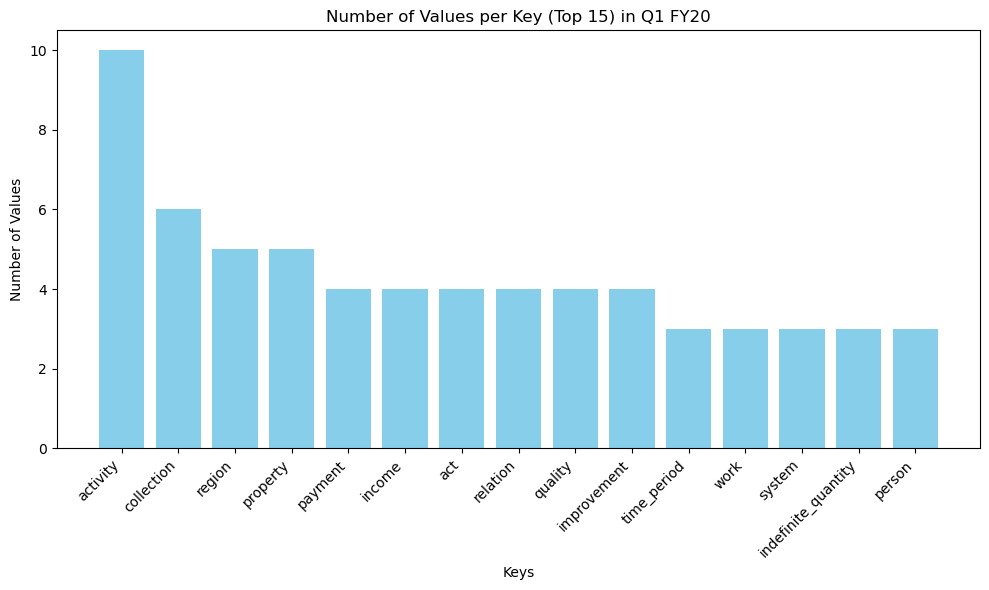

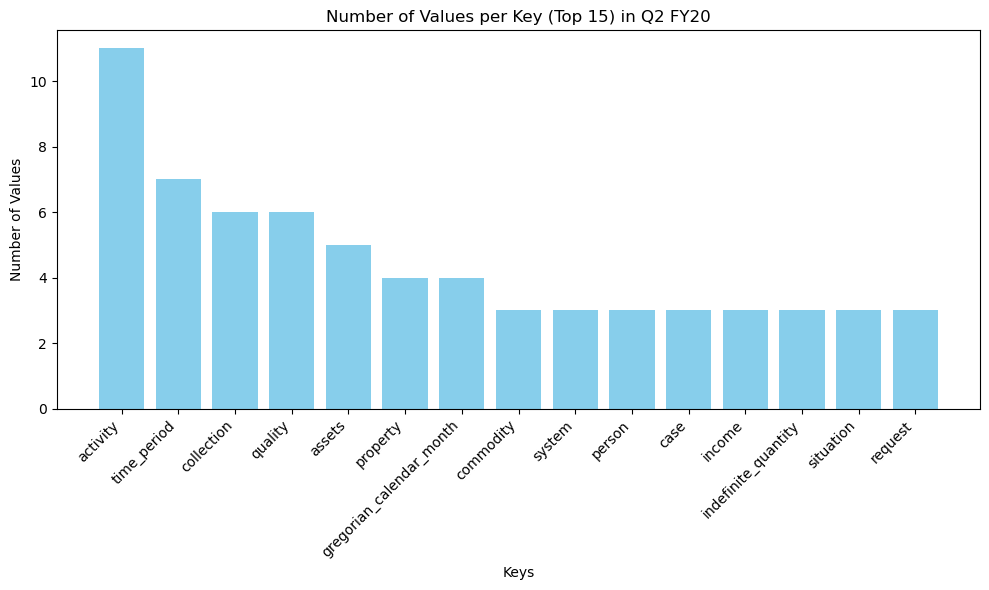

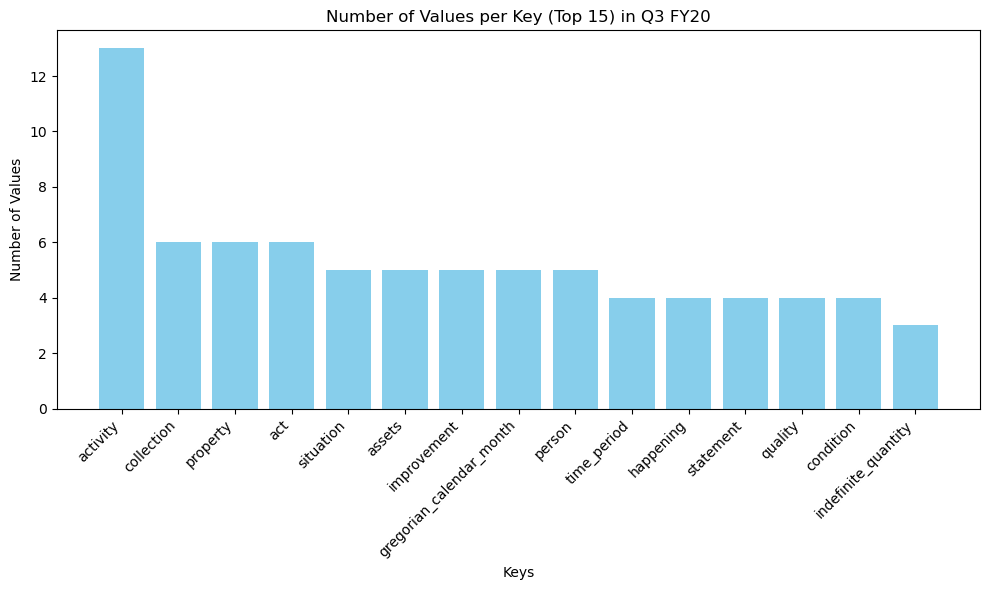

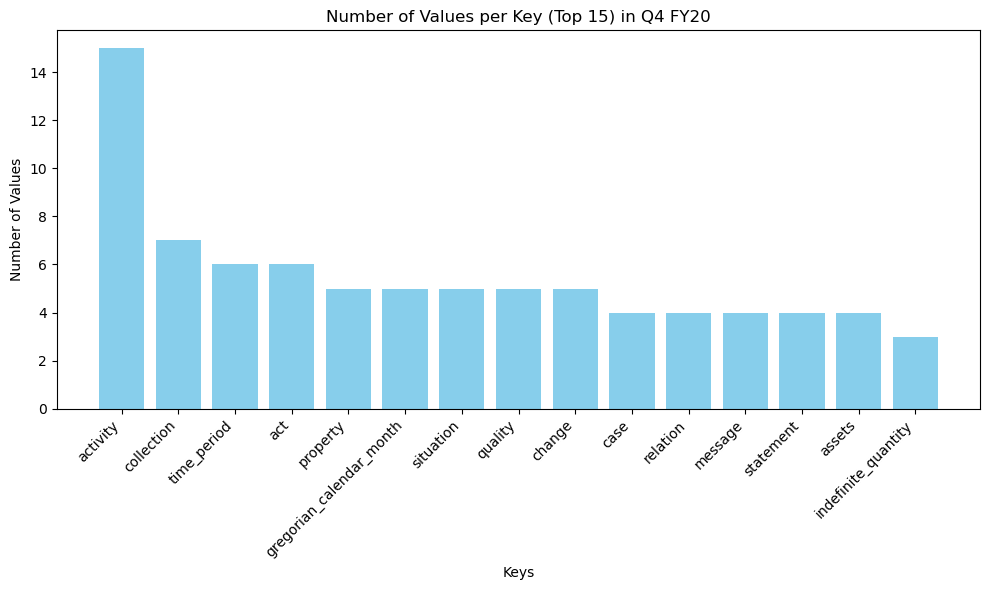

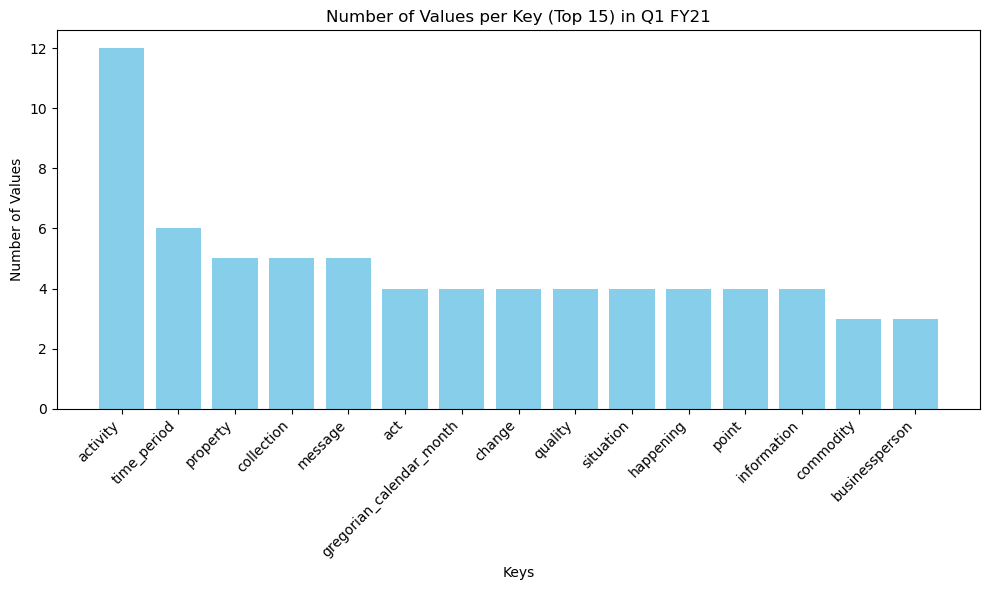

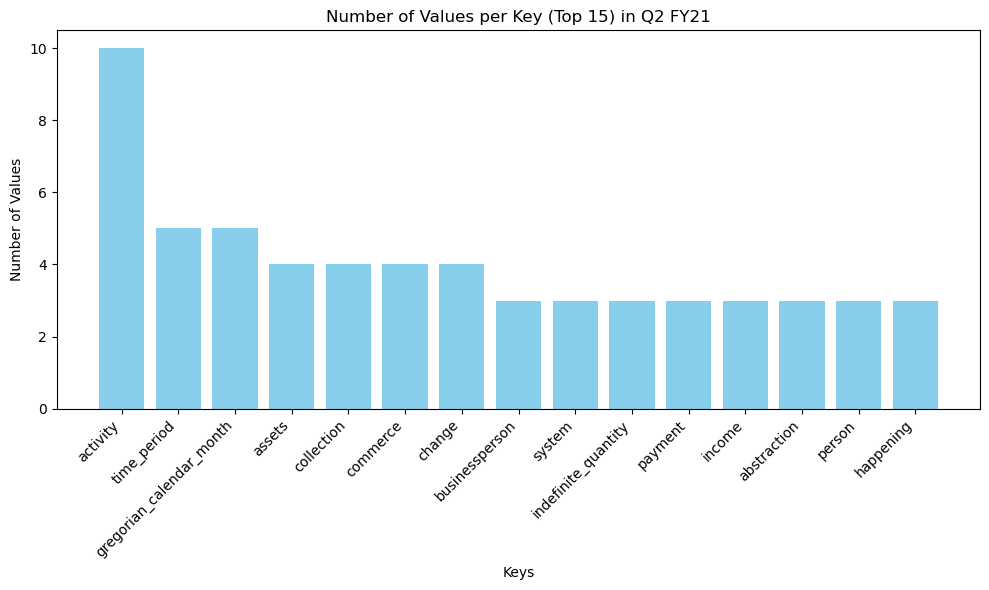

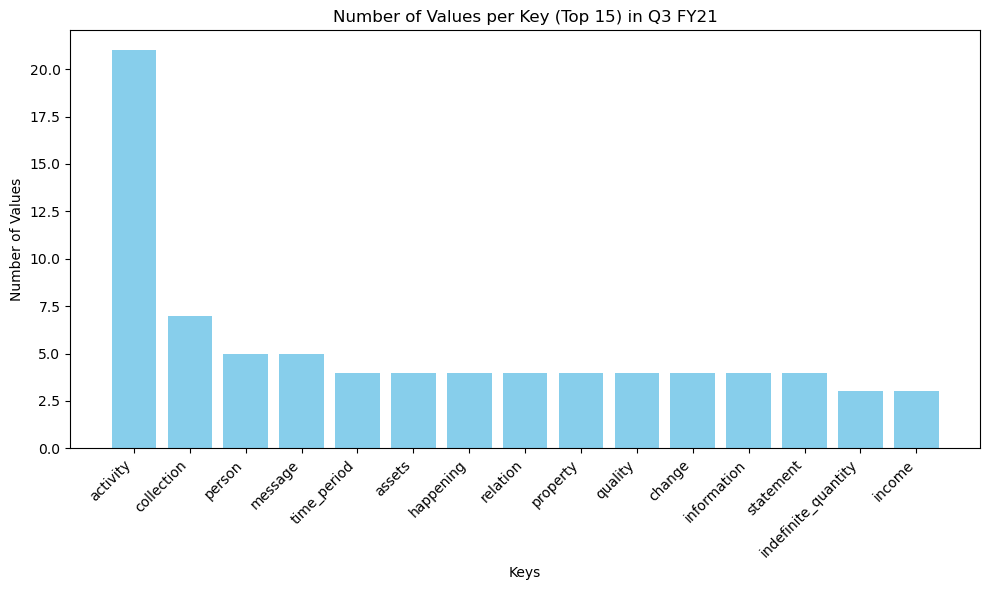

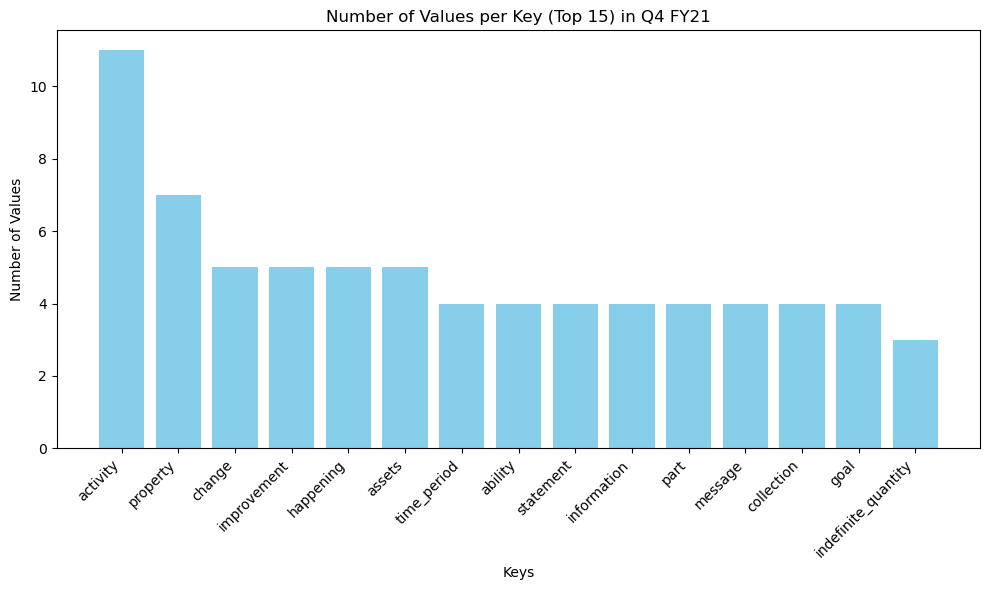

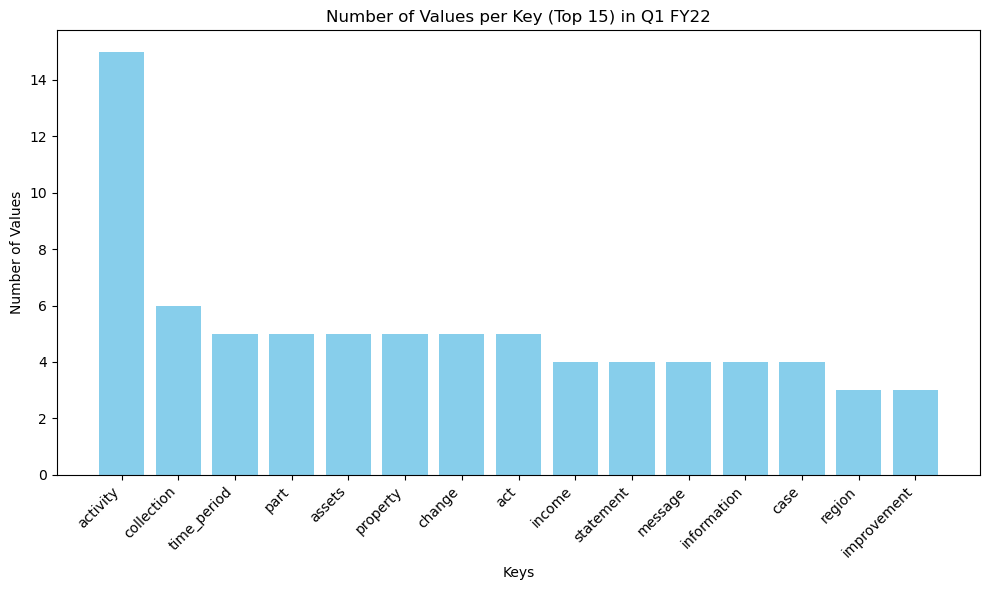

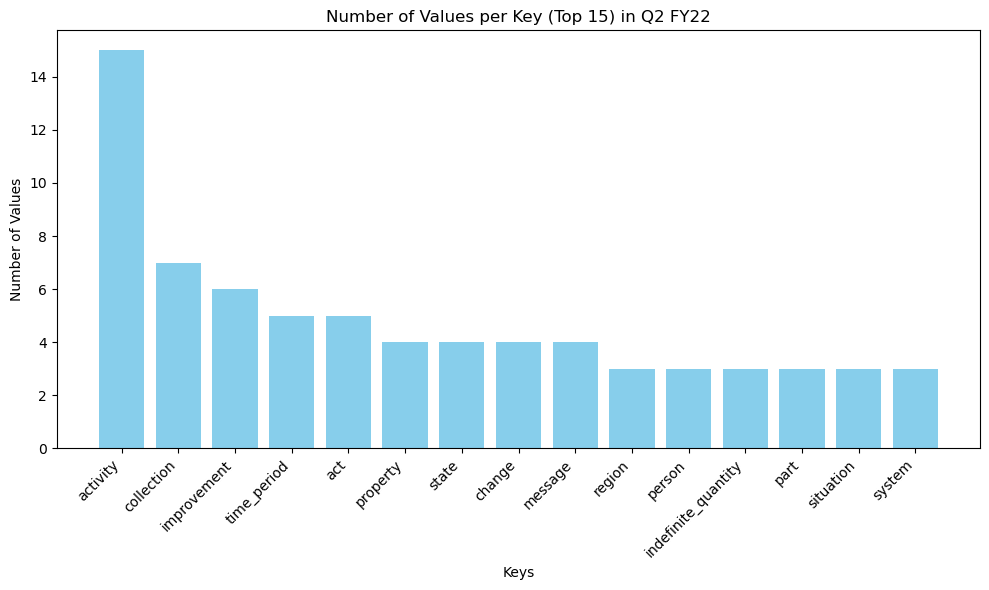

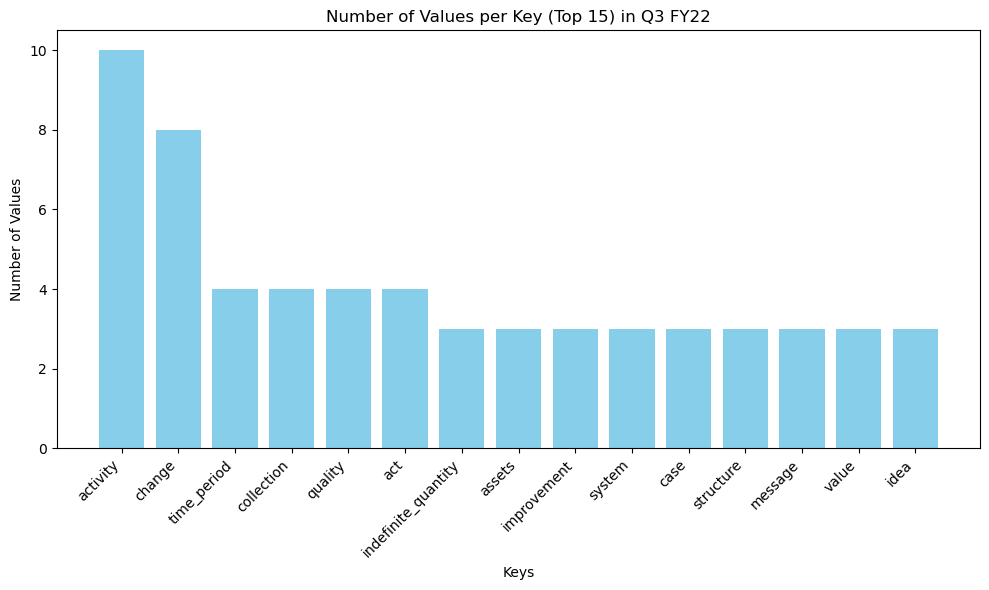

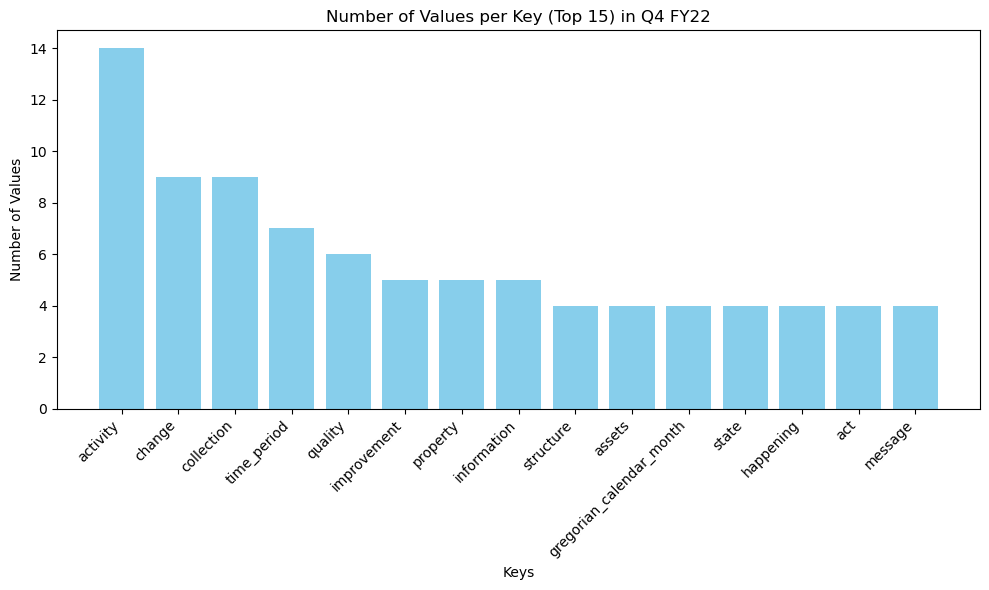

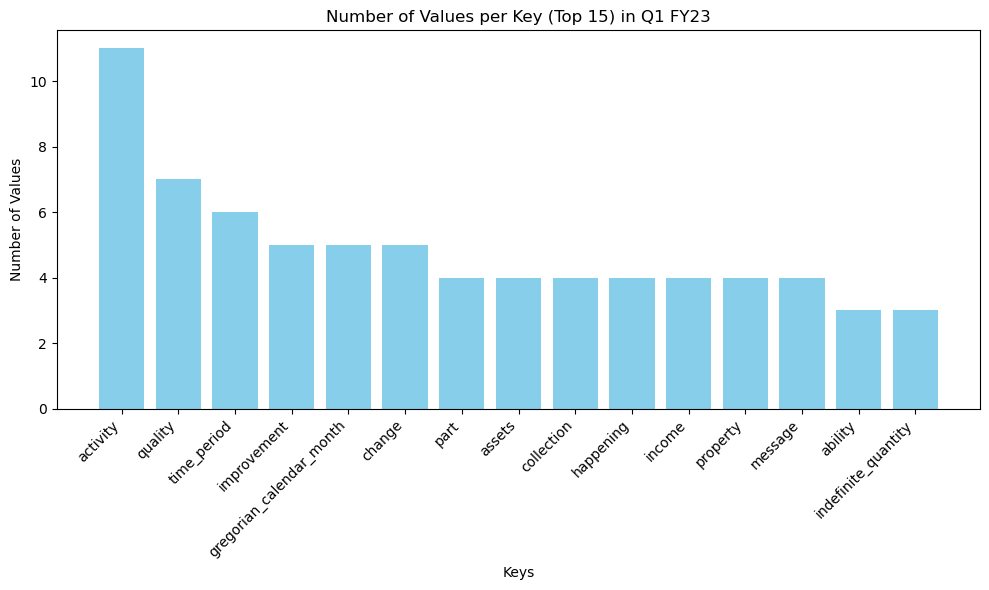

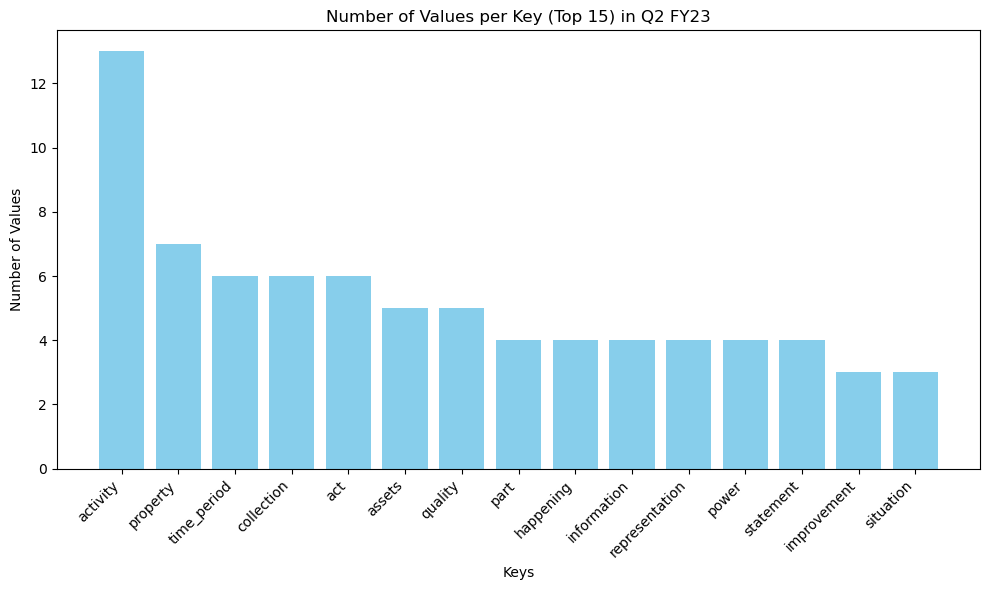

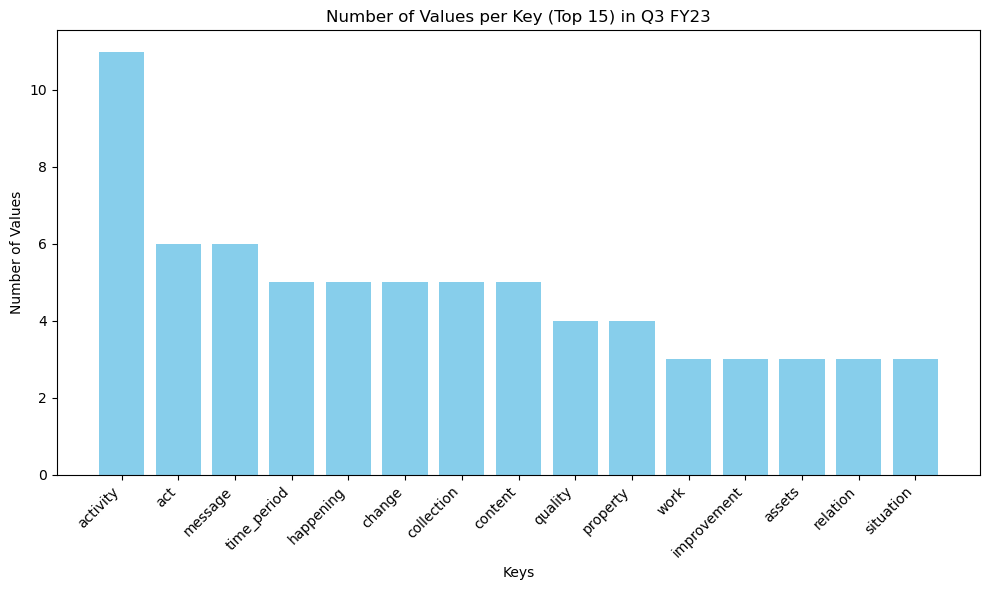

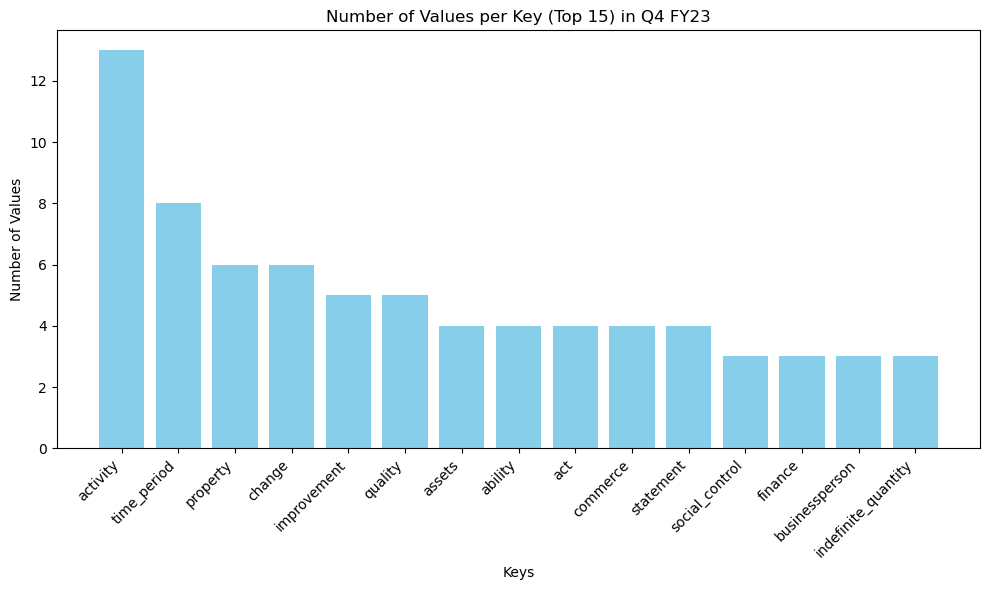

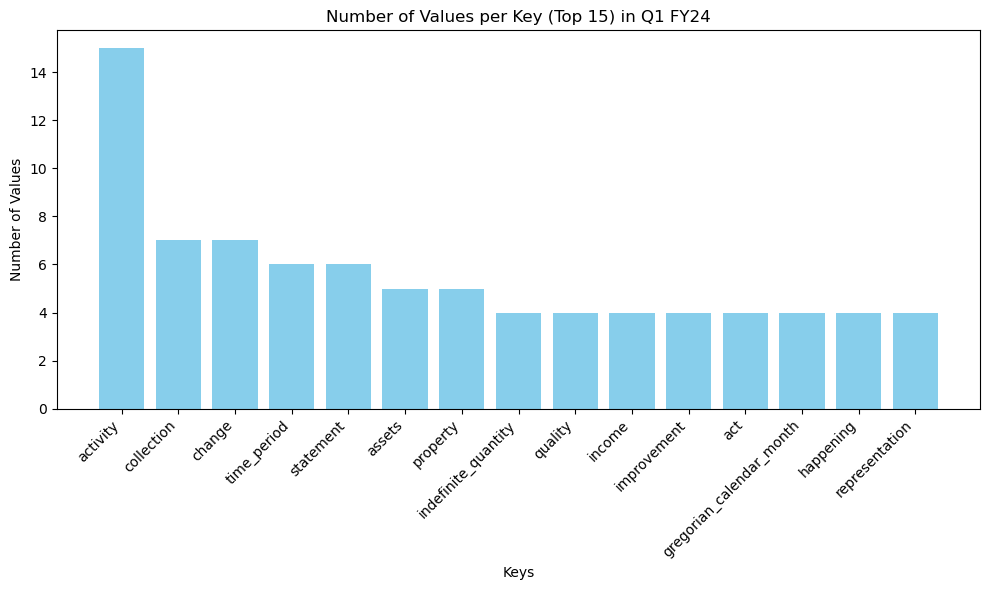

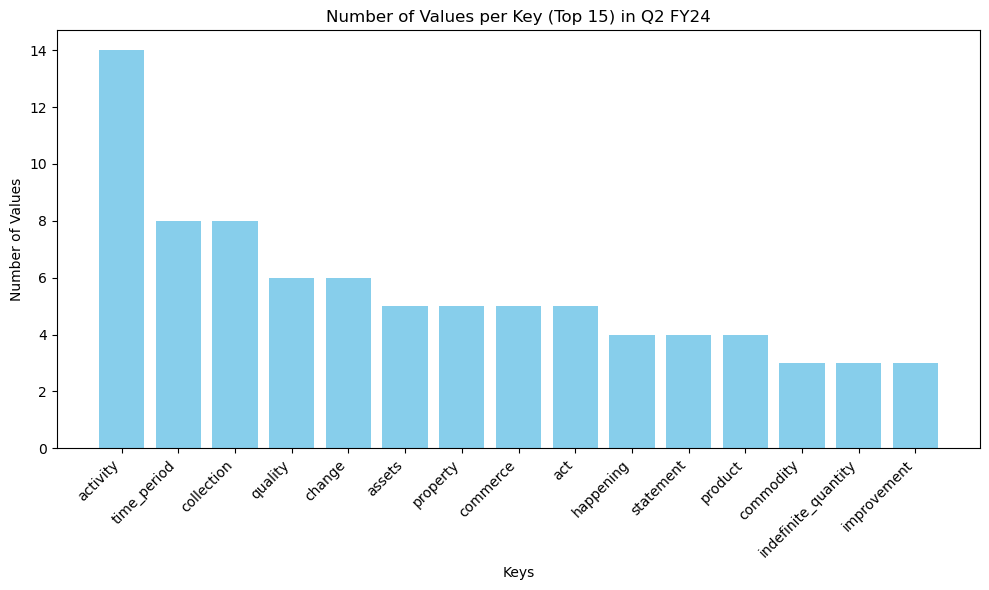

In [61]:
df_list = []
for i in range(len(bucket_list)):
    # Count the number of values (items) per key
    values_count = {key: len(value) for key, value in bucket_list[i].items()}

    # Sort the keys by the number of values
    sorted_keys = sorted(values_count.items(), key=lambda x: x[1], reverse=True)

    # Extract top 15 keys and their counts
    top_keys, top_counts = zip(*sorted_keys[:15])
    df_to_append = pd.DataFrame(top_keys, top_counts).reset_index()
    df_to_append.columns = ['Number of Values', f'Category in {index[i]}']
    df_list.append(df_to_append)

    # Plot the bar chart for the top 15 keys
    plt.figure(figsize=(10, 6))
    plt.bar(top_keys, top_counts, color='skyblue')
    plt.xlabel('Keys')
    plt.ylabel('Number of Values')
    plt.title(f'Number of Values per Key (Top 15) in {index[i]}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()    

### Print Associated Tables Per Quarter

In [66]:
for table in df_list:
    print(table)

    Number of Values  Category in Q4 FY18
0                 13             activity
1                  8           collection
2                  7               change
3                  5               assets
4                  5              quality
5                  4          time_period
6                  4  indefinite_quantity
7                  4      instrumentality
8                  4             property
9                  4             commerce
10                 4             relation
11                 3            commodity
12                 3       businessperson
13                 3            structure
14                 3          improvement
    Number of Values  Category in Q3 FY19
0                 15             activity
1                  7          time_period
2                  7           collection
3                  7               change
4                  6                  act
5                  5            commodity
6                  4             p